# Simple Spiking Neural Network (SNN)

The aim of this project is to create a very simple spiking neural network, with the focus being on acheiving some specific behaviors:

* Graded potentials
	The neuron be able to receive small inputs that change its membrane potential
* Action potentials
	When the membrane potential reaches the AP Treshold, it should generate a spike that is passed along to other neurons
* Refractory period
	After generating a spike, the membrane potential should return to its resting potential and should be more resistant to input potentials for some amount of time
* Neuron fatigue
	A strong enough input to the neuron should generate several action potentials followed by a longer, and more resiliant, refractory period

# Defining the Neuron

In a real neuron, various different ions within the cell determine its membrane potential, most notable Sodium, Potasium, Calcium, and Chloride. Across the membrane of the neuron are different channels that allow the passage of ions into and out of the cell, either passively or actively, such as the Sodium/Pottasium pump, which exchanges Sodium and Pottasium ions into and out of the cell. There are many more ions involved, but this simple model will only utilize generic positive and negative ions, cations and anions respectively, so that future projects may more easily build off of this one by adding more ion types.

Each neuron can be represented by these values:
* rp - resting potential
* tp - threshold potential
* cg - cation channel goal value
$$cg=\frac{b}{2}-\frac{b}{1+e^{-0.05(m-r)}}+i$$
* ag - anion channel goal value
$$ag=-\frac{b}{2}+\frac{b}{1+e^{-0.05(m-r)}}-i$$
* cc - cation channels
$$cc=cc-0.01(cc-cg)$$
* ac - anion channels
$$ac=ac-0.01(ac-ag)$$
* c - cation concentration
$$c=log(1+e^{c+cc})$$
* a - anion concentration
$$a=log(1+e^{a+ac})$$
* mp - membrane potential
$$mp=(c-a)-0.1*(c-1)$$
* i - the input voltage to the neuron

(-100, 50)

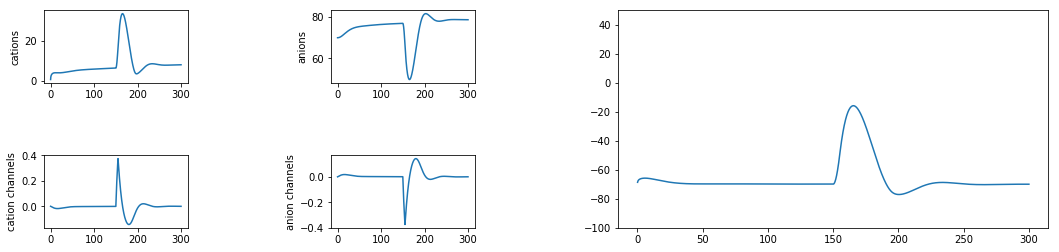

In [244]:
import matplotlib.pyplot as plt
import numpy as np

b = 0.5
mp = -70.0
rp = -70.0
tp = 20.0
cc = (b / 2) - b / (1 + np.exp(-0.05 * (mp - rp)))
ac = -(b / 2) + b / (1 + np.exp(-0.05 * (mp - rp)))
c = 0
a = 70
i = 0.0

t = 0.0

hist_mp = []
hist_cat = []
hist_ani = []
hist_ch_cat = []
hist_ch_ani = []
hist_i = []
hist_t = []


for x in range(0, 3000):
    if 150 < t < 155:
        i = 1
    else:
        i = 0.0
    
    cg = (b/2) - b / (1 + np.exp(-0.05 * (mp - rp))) + i
    ag = -(b/2) + b / (1 + np.exp(-0.05 * (mp - rp))) - i
    
    cc -= 0.01 * (cc - cg)
    ac -= 0.01 * (ac - ag)
    
    c = np.log(1 + np.exp(c + cc))
    a = np.log(1 + np.exp(a + ac))
    
    mp = (c - a) - 0.01 * (c - a)

    t += 0.1
    
    hist_mp.append(mp)
    hist_cat.append(c)
    hist_ani.append(a)
    hist_ch_cat.append(cc)
    hist_ch_ani.append(ac)
    hist_t.append(t)
    
fig = plt.figure(figsize=(18, 4))
fig.subplots_adjust(wspace=1.0, hspace=1.0)

grid = plt.GridSpec(2, 4, hspace=1, wspace=1)

cat_subplot = fig.add_subplot(grid[0, 0])
ani_subplot = fig.add_subplot(grid[0, 1])
ch_cat_subplot = fig.add_subplot(grid[1, 0])
ch_ani_subplot = fig.add_subplot(grid[1, 1])
mp_subplot = fig.add_subplot(grid[:2, 2:4])

cat_subplot.plot(hist_t, hist_cat)
cat_subplot.set_ylabel('cations')
ani_subplot.plot(hist_t, hist_ani)
ani_subplot.set_ylabel('anions')
ch_cat_subplot.plot(hist_t, hist_ch_cat)
ch_cat_subplot.set_ylabel('cation channels')
ch_ani_subplot.plot(hist_t, hist_ch_ani)
ch_ani_subplot.set_ylabel('anion channels')
mp_subplot.plot(hist_t, hist_mp)
mp_subplot.set_ylim(-100, 50)


When the membrane potential is above the resting potential, the neuron attempts to get rid of cations and increase the concentration of anions to lower its membrane potential. Based on the current membrane potential, cation_ch and anion_ch are given a target value that they try to reach.

